## Notebook Imports and Packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Example 1, a simple cost function
$f(x)=x^2+x+1$

In [2]:
def f(x):
    return x**2+x+1

Data generation

In [3]:
x_1 = np.linspace(start=-3,stop=3, num=100)

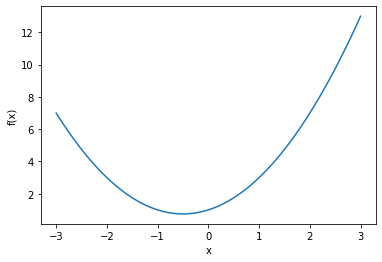

In [4]:
plt.plot(x_1, f(x_1))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

The derivative of $f(x)$ is $f'(x)=2x+1$ 

In [5]:
def df(x):
    return 2*x+1

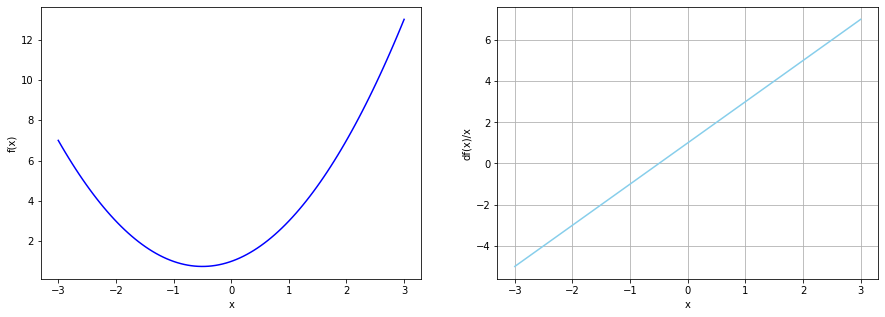

In [6]:
#f(x)and df(x)/dx plot side by side

plt.figure(figsize=[15,5])


#f(x) chart
plt.subplot(1, 2, 1)

plt.plot(x_1, f(x_1),color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')


#derivative of f(x) chart
plt.subplot(1 ,2 , 2)
plt.grid()
plt.xlabel('x')
plt.ylabel('df(x)/x')
plt.plot(x_1, df(x_1),color='skyblue')

plt.show()

### Gradient Descent

In [7]:
new_x=3
previous_x=0
gamma=0.1
precision=0.00001
step_size=2
x_list=[new_x]
slope_list=[df(new_x)]

for n in range(200):
    previous_x=new_x
    gradient=df(previous_x)
    new_x=previous_x-gamma*gradient
    
    step_size=abs(new_x-previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print(n)
        break
    

50


In [8]:

print(new_x)
print('cost:' ,f(new_x))
print('slope',df(new_x))

-0.49996003706460423
cost: 0.7500000015970362
slope 7.992587079153068e-05


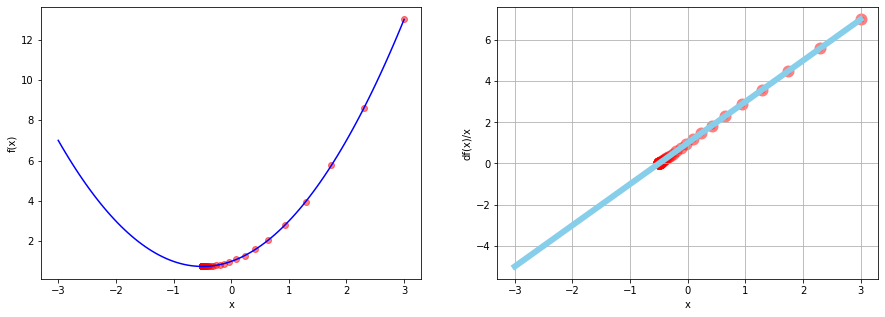

In [9]:
#gradient descent calculations

plt.figure(figsize=[15,5])


#
plt.subplot(1, 2, 1)
plt.plot(x_1, f(x_1),color='blue')

plt.xlabel('x')
plt.ylabel('f(x)')

values_x=np.array(x_list)
plt.scatter(values_x, f(values_x), color='red', alpha=0.5)

#t
plt.subplot(1 ,2 , 2)
plt.grid()
plt.xlabel('x')
plt.ylabel('df(x)/x')
plt.plot(x_1, df(x_1),color='skyblue' ,linewidth=6)
plt.scatter(x_list, slope_list,color='red',alpha=0.5, linewidth=6)


plt.show()

### Example 2 Multiple Minima vs Initial Guess and Advanced Functions

$$g(x)=x^4-4x^2+5$$

In [10]:
x_2=np.linspace(-2,2,1000)

In [11]:
#g(x) function 

def g(x):
    return x**4-4*x**2+5

#derivative of g(x)
def dg(x):
   return 4*x**3-8*x

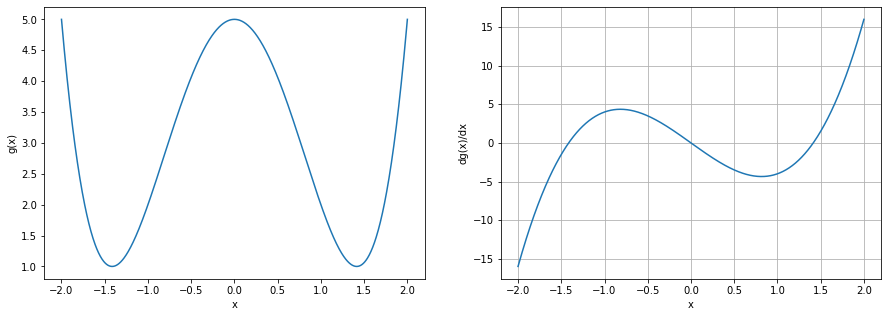

In [12]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.ylabel('g(x)')
plt.xlabel('x')
plt.plot(x_2, g(x_2))

plt.subplot(1,2,2)
plt.ylabel('dg(x)/dx')
plt.xlabel('x')
plt.grid()
plt.plot(x_2, dg(x_2))
plt.show()

### Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):

    new_x=initial_guess 
    
    
    
    
    x_list=[new_x]
    slope_list=[derivative_func(new_x)]

    for n in range(max_iter):
        previous_x=new_x
        gradient=derivative_func(previous_x)
        new_x=previous_x-multiplier*gradient

        step_size=abs(new_x-previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
             break
    return new_x, x_list, slope_list
    

In [14]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dg, initial_guess=-1.8)

In [15]:
print(local_min)
print(list_x)

print('Number of steps:', len(list_x))

-1.4157132143311408
[-1.8, -1.62144, -1.5398403609054412, -1.4941245532499114, -1.4663448117261653, -1.4487290710813727, -1.437276471240372, -1.4297148269459914, -1.4246725674396756, -1.4212884658245744, -1.419007479410965, -1.4174656169176147, -1.4164213671464125, -1.4157132143311408]
Number of steps: 14


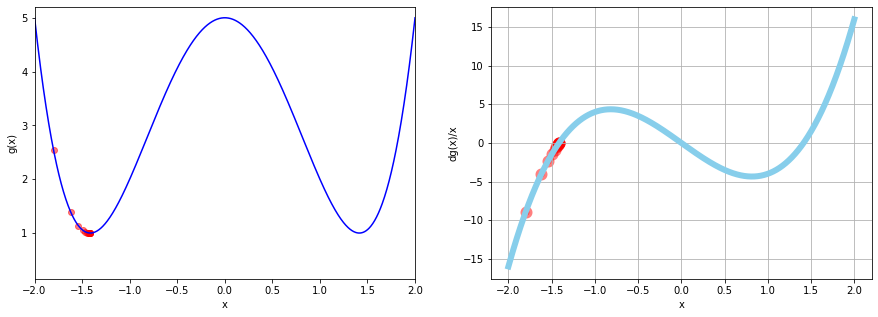

In [16]:
#gradient descent calculations

plt.figure(figsize=[15,5])


#
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2),color='blue')
plt.xlim(-2,2)
plt.ylim(0.15)
plt.xlabel('x')
plt.ylabel('g(x)')


plt.scatter(list_x, g(np.array(list_x)), color='red', alpha=0.5)

#t
plt.subplot(1 ,2 , 2)
plt.grid()
plt.xlabel('x')
plt.ylabel('dg(x)/x')
plt.plot(x_2, dg(x_2),color='skyblue' ,linewidth=6)
plt.scatter(list_x, deriv_list,color='red',alpha=0.5, linewidth=6)


plt.show()

### Example 3 Divergence, Overflow and Python Tuples.
### $$h(x)=x^5-2x^4+2$$


In [17]:
x_3=np.linspace(-2.5, 2.5, num=1000)

def h(x):
    return x**5-2*x**4+2

def dh(x):
    return 5*x**4-8*x**3

In [18]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dh, initial_guess=-0.28, max_iter=24)

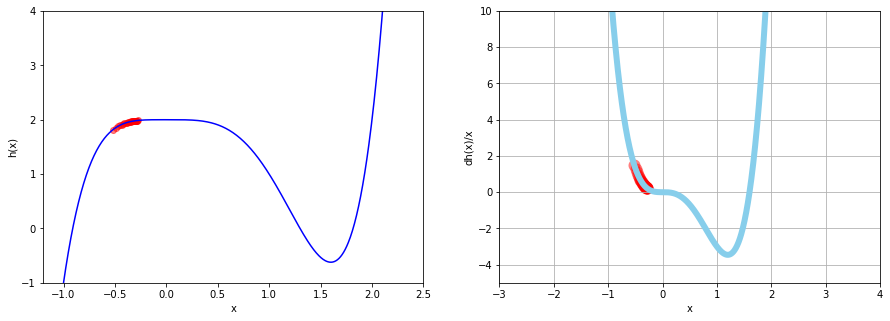

Local min occurs at -0.5187879846956702
Cost at thus minimum is 1.8175468988639811
Number of steps 25


In [19]:
#gradient descent calculations

plt.figure(figsize=[15,5])


#
plt.subplot(1, 2, 1)
plt.plot(x_3, h(x_3),color='blue')
plt.xlim(-1.2,2.5)
plt.ylim(-1, 4)
plt.xlabel('x')
plt.ylabel('h(x)')


plt.scatter(list_x, h(np.array(list_x)), color='red', alpha=0.5)

#
plt.subplot(1 ,2 , 2)
plt.grid()
plt.xlabel('x')
plt.ylabel('dh(x)/x')
plt.ylim(-5,10)
plt.xlim(-3,4)
plt.plot(x_3, dh(x_3),color='skyblue' ,linewidth=6)
plt.scatter(list_x, deriv_list,color='red',alpha=0.5, linewidth=6)


plt.show()

print('Local min occurs at',local_min)
print('Cost at thus minimum is', h(local_min))
print('Number of steps', len(list_x))


### Learning Rate

In [20]:
n=100
low_gamma=gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, max_iter=n, precision=0.0001)

mid_gamma=gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, max_iter=n, precision=0.0001)

high_gamma=gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, max_iter=n, precision=0.0001)

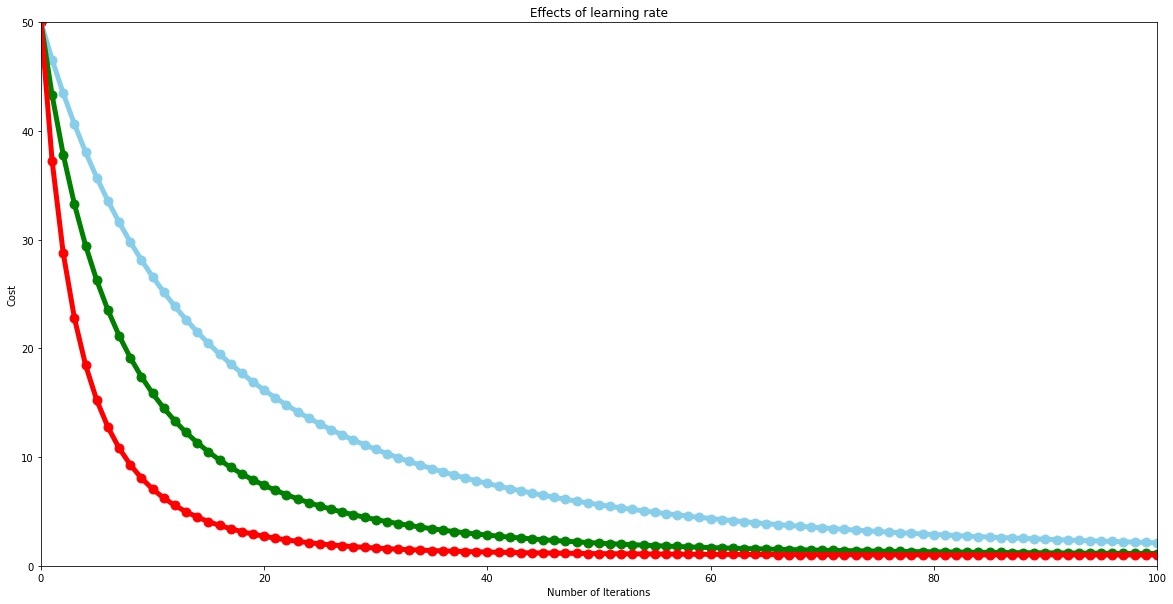

In [21]:
#gradient descent calculations

plt.figure(figsize=[20,10])


#


plt.xlim(0,n)
plt.title('Effects of learning rate')
plt.ylim(0,50)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')

iteration_list=list(range(0, n+1))


low_values=np.array(low_gamma[1])

mid_values=np.array(mid_gamma[1])

high_values=np.array(high_gamma[1])

plt.plot(iteration_list, g(low_values),color='skyblue' ,linewidth=5, label='Low Learning Rate')
plt.scatter(iteration_list, g(low_values), color='skyblue', s=80, label='Low Learning Rate' )

plt.plot(iteration_list, g(mid_values),color='green' ,linewidth=5, label='Middle Learning Rate')
plt.scatter(iteration_list, g(mid_values), color='green', s=80,label='Middle Learning Rate' )

plt.plot(iteration_list, g(high_values),color='red' ,linewidth=5, label='Middle Learning Rate')
plt.scatter(iteration_list, g(high_values), color='red', s=80,label='Middle Learning Rate' )


plt.show()



### Example 4 - Data Visualization with 3D Charts

## Minimise $$f(x,y)=\frac{1}{3^{-x^2-y^2}+1}$$

Minimise $$f(x,y)=\frac{1}{r+1}$$Where $r$ is $3^{-x^2-y^2}$

In [22]:
def f(x,y):
    r=3**(-x**2-y**2)
    return 1/(r+1)

In [23]:
#Make our x and y data
x_4=np.linspace(start=-2, stop=2, num=200)
y_4=np.linspace(start=-2, stop=2, num=200)

print('Shape of x array before meshgrid', x_4.shape)

x_4, y_4=np.meshgrid(x_4,y_4)

print('Shape of x array after meshgrid', x_4.shape)



Shape of x array before meshgrid (200,)
Shape of x array after meshgrid (200, 200)


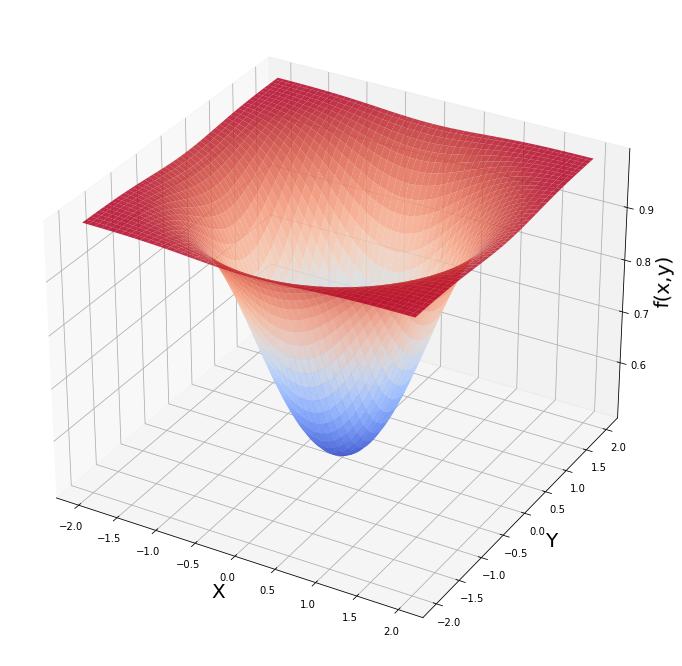

In [24]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)',fontsize=20)




ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.coolwarm, alpha=0.85)

### Partial Derivatives and Symbolic Computation

## $$\frac{\partial f}{\partial x}=\frac{2x \ln(3) \cdot 3^{-x^2-y^2}}{\left (3^{-x^2-y^2}+1\right)^2}$$

## $$\frac{\partial f}{\partial y}=\frac{2y \ln(3) \cdot 3^{-x^2-y^2}}{\left (3^{-x^2-y^2}+1\right)^2}$$

In [25]:
# Partial Derivative Functions

def fpx(x,y):
   return 2*x*np.log(3)*3**(-x**2-y**2)/((3**(-x**2-y**2))+1)**2


def fpy(x,y):
   return 2*y*np.log(3)*3**(-x**2-y**2)/((3**(-x**2-y**2))+1)**2

In [26]:
print(fpx(1.8, 1.0))

0.036808971619750504


In [27]:
a, b=symbols('x, y')
print('Our Cost Function f(x,y) is the one below:')
print(f(a, b))


print('The cost function at the point x=1.8, y=1 is:', f(a,b).evalf(subs={a:1.8, b:1.0}))


Our Cost Function f(x,y) is the one below:
1/(3**(-x**2 - y**2) + 1)
The cost function at the point x=1.8, y=1 is: 0.990604794032582


In [28]:
print('The partial derivative with respect to x and at point x=1.8, y=1 is:')
diff(f(a,b), a).evalf(subs={a:1.8, b:1.0})

The partial derivative with respect to x and at point x=1.8, y=1 is:


0.0368089716197505

### Batch Gradient Descent With Sympy

In [29]:
#Setup
multiplier=0.1
max_iter=500
params=np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients=np.array([gradient_x, gradient_y])
    params= params- multiplier*gradients

print('Values of the Gradient:', gradients)
print('Minimum occurs at an x value of', params[0])
print('Minimum occurs at an y value of', params[1])
print(' The cost at those values for x and y are', f(params[0],params[1]))

Values of the Gradient: [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at an x value of 3.45838599885832e-11
Minimum occurs at an y value of 1.92132555492129e-11
 The cost at those values for x and y are 0.500000000000000


In [30]:
# Gradient Descent with manually written functions
multiplier=0.1
max_iter=500
params=np.array([1.8, 1])

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients=np.array([gradient_x, gradient_y])
    params= params- multiplier*gradients

print('Values of the Gradient:', gradients)
print('Minimum occurs at an x value of', params[0])
print('Minimum occurs at an y value of', params[1])
print(' The cost at those values for x and y are', f(params[0],params[1]))

Values of the Gradient: [2.01013038e-11 1.11673910e-11]
Minimum occurs at an x value of 3.458385998858304e-11
Minimum occurs at an y value of 1.9213255549212797e-11
 The cost at those values for x and y are 0.5


## Graphing the 3D Gradient Descent

In [31]:
#
multiplier=0.1
max_iter=400
params=np.array([1.8, 1.0])
values_array=params.reshape(1, 2)



for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients=np.array([gradient_x, gradient_y])
    params= params- multiplier*gradients
    values_array=np.append(values_array, params.reshape(1, 2), axis=0)

print('Values of the Gradient:', gradients)
print('Minimum occurs at an x value of', params[0])
print('Minimum occurs at an y value of', params[1])
print(' The cost at those values for x and y are', f(params[0],params[1]))

Values of the Gradient: [5.71287516e-09 3.17381953e-09]
Minimum occurs at an x value of 9.828878619733109e-09
Minimum occurs at an y value of 5.460488122073948e-09
 The cost at those values for x and y are 0.5


In [32]:
#Advanced Numpy Array Practice

otzias=np.array([['Beach', 'Sea'], ['Sand', 'water']])
giali=np.array([['Shells', 'Drinks'],['Stones', 'Waves']])

paralies=np.append(arr=otzias, values=giali, axis=0)
#print(paralies)

#print(paralies[:,1])

kea=np.append(arr=paralies, values=[['Simos', 'Anna']], axis=0)

print(kea[:, 1])

['Sea' 'water' 'Drinks' 'Waves' 'Anna']


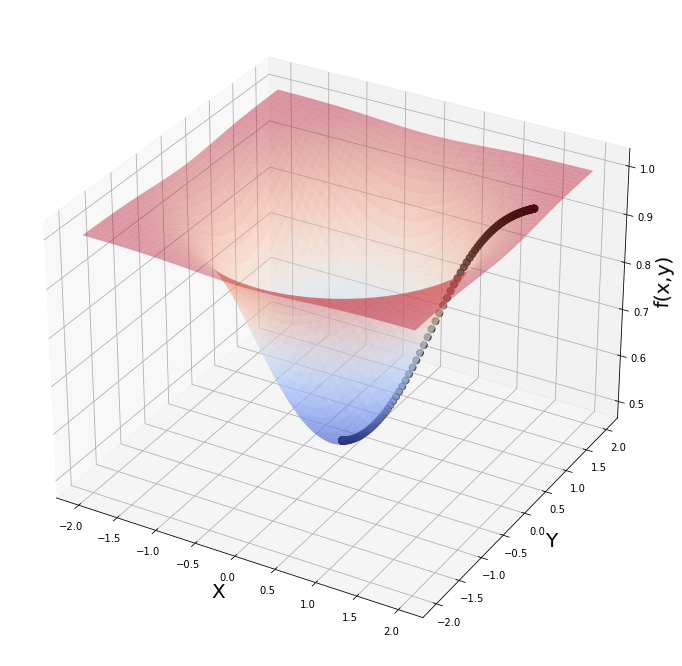

In [33]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)',fontsize=20)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]),s=50,color='black')



ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.coolwarm, alpha=0.4)

## Example 5 - Working with Data & a Real Cost Function

### Mean Square Error

### $$RSS=\sum_{i=1}^{n} \big(y^{(i)}-h_\theta x^{(i)} \big)^2$$

### $$MSS=\frac{1}{n}\sum_{i=1}^{n} \big(y^{(i)}-h_\theta x^{(i)} \big)^2$$

### $$MSS=\frac{1}{n}\sum_{i=1}^{n} \big(y-\hat{y} \big)^2$$

In [34]:
# Make sample data

x_5=np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7,6.5]).reshape(7,1)

y_5=np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4,8.2]).reshape(7,1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [35]:
#Quick Regression
regr=LinearRegression()
regr.fit(x_5,y_5)
print('Intercept:',regr.intercept_[0])
print('Coefficient:',regr.coef_[0][0])

Intercept: 0.8475351486029536
Coefficient: 1.2227264637835915


Text(0, 0.5, 'y values')

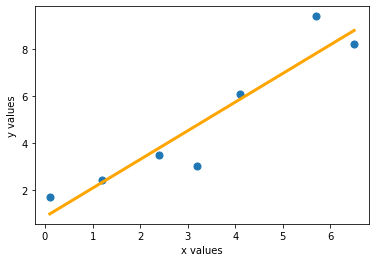

In [36]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5), color='orange',linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')

In [37]:
y_hat=0.8475351486029536+x_5*1.2227264637835915
print('Estimated y values:',y_hat)
print('The real y values are:', y_5)

Estimated y values: [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
The real y values are: [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [38]:
#Function that calculates the MSE
def mse(y,y_hat):
    mse=np.sum((y-y_hat)**2)/y.size
    return mse


In [39]:
print('The MSE of the linear regression is:',mse(y_5,y_hat))

The MSE of the linear regression is: 0.9479655759794577


In [40]:
#Scikit Learn in-build MSE function
print(mean_squared_error(y_5,regr.predict(x_5)))


0.9479655759794577


## 3D Plor for the MSE function

### Make Data for Thetas

In [41]:
nr_thetas=200
th_0=np.linspace(start=-1, stop=3, num=nr_thetas)
th_1=np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1=np.meshgrid(th_0,th_1)



### Calculating the MSE using nested loops

In [42]:
plot_cost=np.zeros((nr_thetas,nr_thetas))

In [43]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat=plot_t0[i][j]+plot_t1[i][j]*x_5
        plot_cost[i][j]=mse(y_5,y_hat)
        
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

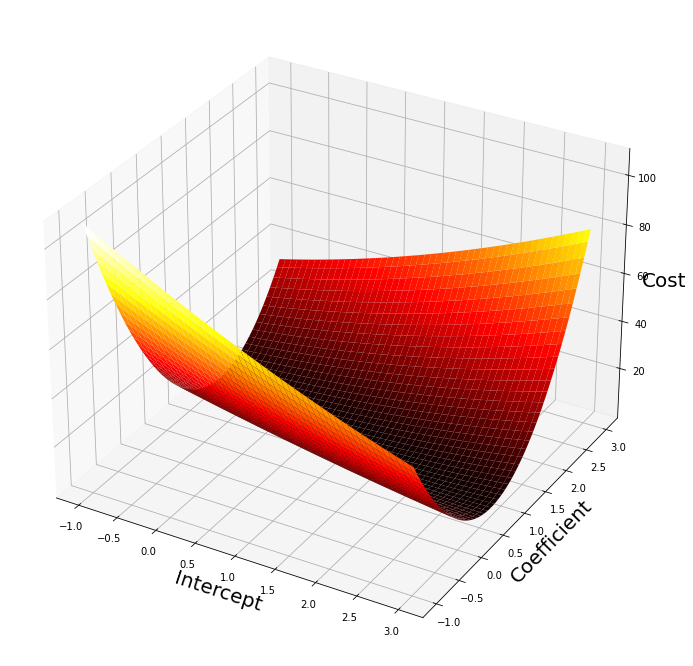

In [44]:
#Plotting
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('Intercept',fontsize=20)
ax.set_ylabel('Coefficient',fontsize=20)
ax.set_zlabel('Cost',fontsize=20)

ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap=cm.hot)
plt.show()

In [45]:
print('Min value of cost:',plot_cost.min())
ij_min=np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)

print('i and j indices of the min cost:',ij_min)
print('Theta 0 and Theta 1 values that produced the least cost:', plot_t0[ij_min[0]][ij_min[1]], ',',plot_t1[ij_min[0]][ij_min[1]] )


Min value of cost: 0.9483826526747164
i and j indices of the min cost: (111, 91)
Theta 0 and Theta 1 values that produced the least cost: 0.829145728643216 , 1.2311557788944723


### Partial Derivatives of the MSE function with respect to $\theta_0$ and $\theta_1$



### MSE and Gradient Descent

In [46]:
# The thetas parameter takes an array of theta_0 and theta_1
def grad(x,y,thetas):
    n=y.size
    f_1=(-2/n) * sum(y-thetas[0]-thetas[1] * x) 
    f_2=(-2/n) * sum((y-thetas[0]-thetas[1] * x) * x)
    
    return np.array([f_1[0], f_2[0]])
    

In [66]:
multiplier=0.01
thetas=np.array([2.9, 2.9])
theta_values_array=thetas.reshape(1,2)
mse_vals=mse(y_5, thetas[0]+thetas[1]*x_5)


for i in range(1000):
    gradient=grad(x_5, y_5, thetas)
    thetas=thetas-multiplier * gradient
    theta_values_array=np.append(theta_values_array,thetas.reshape(1,2) ,axis=0)
    mse_vals=np.append(arr=mse_vals,values=mse(y_5, thetas[0]+thetas[1]*x_5))

In [65]:
print('Optimal Theta values:',thetas[0], thetas[1])
print('The MSE at the optimal theta values is:', mse(y=y_5, y_hat=thetas[0]+thetas[1]*x_5) )

Optimal Theta values: 0.8532230461743415 1.2214935332607393
The MSE at the optimal theta values is: 0.9479751138321334


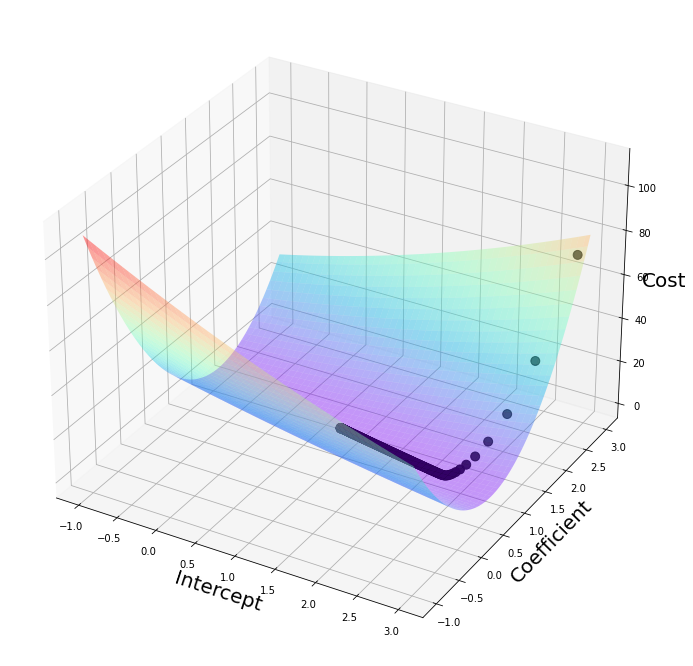

In [71]:
#Plotting
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('Intercept',fontsize=20)
ax.set_ylabel('Coefficient',fontsize=20)
ax.set_zlabel('Cost',fontsize=20)

ax.scatter(theta_values_array[:,0], theta_values_array[:,1],mse_vals,s=80, color='black' )
ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()